In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import metrics
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
##Load datasets
with open('dat/dfmain.pkl', 'rb') as pickle_file:
    dfmain = pickle.load(pickle_file) 

In [38]:
df=dfmain[['V65_@1_violencia_previa','V66_@2_historia_delictes_no_violents','V67_@3_inici_precoç_violencia',\
           'V68_@4_fracas_intervencions_anteriors','V69_@5_intents_autolesio_suicidi_anteriors','V70_@6_exposicio_violencia_llar',\
          'V71_@7_historia_maltracte_infantil','V72_@8_delinquencia_pares','V73_@9_separacio_precoç_pares',\
          'V74_@10_baix_rendiment_escola','V75_@11_delinquencia_grup_iguals','V76_@12_rebuig_grup_iguals',\
          'V77_@13_estrés_incapacitat_enfrontar_dificultats','V78_@14_escassa_habilitat_pares_educar','V79_@15_manca_suport_personal_social']]
#df['Num_Detections'] = pd.to_numeric(df['Num_Detections'], errors='coerce')
#print (df[ pd.to_numeric(df['Num_Detections'], errors='coerce').isnull()])
df = df - 1

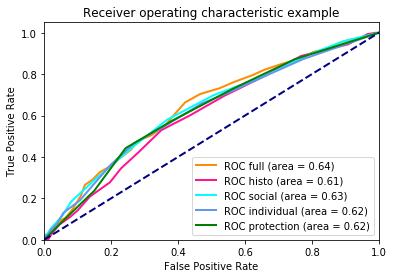

In [41]:
###compute ROC and AUC of SAVRY scores and label value: recidivism in past 2015
fpr_full, tpr_full, thresholds_full = metrics.roc_curve(df.label_value, df.full_score, pos_label=1)
auc_full = metrics.auc(fpr_full, tpr_full)
fpr_histo, tpr_histo, thresholds_histo = metrics.roc_curve(df.label_value, df.V61_SAVRY_historics_total_score, pos_label=1)
auc_histo = metrics.auc(fpr_histo, tpr_histo)
fpr_social, tpr_social, thresholds_social = metrics.roc_curve(df.label_value, df.V62_SAVRY_socials_total_score, pos_label=1)
auc_social = metrics.auc(fpr_social, tpr_social)
fpr_individ, tpr_individ, thresholds_individ = metrics.roc_curve(df.label_value, df.V63_SAVRY_individuals_total_score, pos_label=1)
auc_individ = metrics.auc(fpr_individ, tpr_individ)
fpr_protec, tpr_protec, thresholds_protec = metrics.roc_curve(df.label_value, df.V64_SAVRY_proteccio_total_score, pos_label=1)
auc_protec = metrics.auc(fpr_protec, tpr_protec)
###Compute ROC curves for SAVRY scores
plt.figure()
lw = 2
plt.plot(fpr_full, tpr_full, color='darkorange',
         lw=lw, label='ROC full (area = %0.2f)' % auc_full)
plt.plot(fpr_histo, tpr_histo, color='deeppink',
         lw=lw, label='ROC histo (area = %0.2f)' % auc_histo)
plt.plot(fpr_social, tpr_social, color='aqua',
         lw=lw, label='ROC social (area = %0.2f)' % auc_social)
plt.plot(fpr_individ, tpr_individ, color='cornflowerblue',
         lw=lw, label='ROC individual (area = %0.2f)' % auc_individ)
plt.plot(fpr_protec, tpr_protec, color='green',
         lw=lw, label='ROC protection (area = %0.2f)' % auc_protec)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

You can see that the different SAVRY scores do not give or take a lot in terms of prediction performance. The AUC ranges from 0.61 to 0.64. 

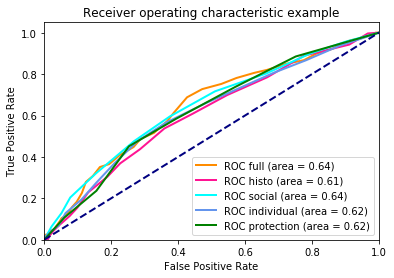

In [45]:
###compute ROC and AUC of SAVRY scores and label value: recidivism in past 2013 years
fpr_full, tpr_full, thresholds_full = metrics.roc_curve(df.V132_REINCIDENCIA_2013, df.full_score, pos_label='Sí')
auc_full = metrics.auc(fpr_full, tpr_full)
fpr_histo, tpr_histo, thresholds_histo = metrics.roc_curve(df.V132_REINCIDENCIA_2013, df.V61_SAVRY_historics_total_score, pos_label='Sí')
auc_histo = metrics.auc(fpr_histo, tpr_histo)
fpr_social, tpr_social, thresholds_social = metrics.roc_curve(df.V132_REINCIDENCIA_2013, df.V62_SAVRY_socials_total_score, pos_label='Sí')
auc_social = metrics.auc(fpr_social, tpr_social)
fpr_individ, tpr_individ, thresholds_individ = metrics.roc_curve(df.V132_REINCIDENCIA_2013, df.V63_SAVRY_individuals_total_score, pos_label='Sí')
auc_individ = metrics.auc(fpr_individ, tpr_individ)
fpr_protec, tpr_protec, thresholds_protec = metrics.roc_curve(df.V132_REINCIDENCIA_2013, df.V64_SAVRY_proteccio_total_score, pos_label='Sí')
auc_protec = metrics.auc(fpr_protec, tpr_protec)
###Compute ROC curves for SAVRY scores
plt.figure()
lw = 2
plt.plot(fpr_full, tpr_full, color='darkorange',
         lw=lw, label='ROC full (area = %0.2f)' % auc_full)
plt.plot(fpr_histo, tpr_histo, color='deeppink',
         lw=lw, label='ROC histo (area = %0.2f)' % auc_histo)
plt.plot(fpr_social, tpr_social, color='aqua',
         lw=lw, label='ROC social (area = %0.2f)' % auc_social)
plt.plot(fpr_individ, tpr_individ, color='cornflowerblue',
         lw=lw, label='ROC individual (area = %0.2f)' % auc_individ)
plt.plot(fpr_protec, tpr_protec, color='green',
         lw=lw, label='ROC protection (area = %0.2f)' % auc_protec)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

No    576
Sí    279
Name: V132_REINCIDENCIA_2013, dtype: int64